In [95]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [96]:
# 날씨 관련 데이터로드
weather_df = pd.read_csv("weather_df.csv")
weather_df.drop(columns='Unnamed: 0', inplace=True)
weather_df.head()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0


In [97]:
# 전력량 관련 데이터 로드
power_kw_df = pd.read_csv("power_usage.csv")
power_kw_df.drop(columns='Unnamed: 0', inplace=True)
power_kw_df.head()

,year,month,usage
0,2016,1,753434128
1,2016,2,756942825
2,2016,3,714022910
3,2016,4,675078079
4,2016,5,630983018


In [98]:
kw_df = pd.merge(weather_df, power_kw_df, how='left', on=['year', 'month'])
kw_df.head()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825
2,2016,3,8.4,60,55.2,4.1,520.95,0.0,714022910
3,2016,4,15.5,66,185.0,5.8,541.64,0.0,675078079
4,2016,5,19.8,65,104.5,5.2,681.60,0.0,630983018


In [99]:
# 결측치 유무 확인
kw_df.isnull().sum()

year              0
month             0
temp              0
Humidity_mean     0
rainfall_total    0
cloud             0
solar             0
snow              0
usage             0
dtype: int64

In [100]:
# 데이터 기초통계량 확인
kw_df.describe()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01
mean,2019.000000,6.500000,14.753571,70.428571,107.540476,5.344048,462.748333,1.809524,7.290542e+08
std,2.012012,3.472786,8.933320,10.019602,117.916294,1.069777,133.913445,4.945209,6.234161e+07
min,2016.000000,1.000000,-0.200000,52.000000,0.300000,3.300000,241.720000,0.000000,6.108654e+08
25%,2017.000000,3.750000,6.875000,62.000000,33.725000,4.600000,343.127500,0.000000,6.810900e+08
50%,2019.000000,6.500000,15.500000,68.500000,76.850000,5.100000,460.300000,0.000000,7.177382e+08
75%,2021.000000,9.250000,23.000000,79.000000,131.250000,6.125000,570.310000,0.000000,7.652902e+08
max,2022.000000,12.000000,28.400000,91.000000,738.100000,8.700000,770.490000,32.900000,8.939148e+08


In [101]:
kw_matrix = kw_df.corr()
kw_matrix = kw_matrix.sort_values(by = 'usage', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix

,usage,Humidity_mean,cloud,rainfall_total,snow,year,temp,month,solar
usage,1.000000,0.331270,0.320904,0.225880,0.204239,1.932979e-01,0.063063,-1.077533e-01,-0.251212
Humidity_mean,0.331270,1.000000,0.759974,0.685070,-0.228311,-5.976416e-04,0.738340,3.562942e-01,0.081978
cloud,0.320904,0.759974,1.000000,0.648221,-0.138775,4.198165e-02,0.542739,5.237492e-02,0.042360
rainfall_total,0.225880,0.685070,0.648221,1.000000,-0.239807,-4.081422e-02,0.610729,1.257373e-01,0.215327
snow,0.204239,-0.228311,-0.138775,-0.239807,1.000000,8.476269e-02,-0.521584,-6.426208e-02,-0.437083
year,0.193298,-0.000598,0.041982,-0.040814,0.084763,1.000000e+00,0.001274,1.769175e-14,0.036816
temp,0.063063,0.738340,0.542739,0.610729,-0.521584,1.273597e-03,1.000000,2.674031e-01,0.660386
month,-0.107753,0.356294,0.052375,0.125737,-0.064262,1.769175e-14,0.267403,1.000000e+00,-0.219640
solar,-0.251212,0.081978,0.042360,0.215327,-0.437083,3.681638e-02,0.660386,-2.196398e-01,1.000000


In [102]:
kw_df.columns

Index(['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'],
      dtype='object')

## 1. matplotlib 산점도

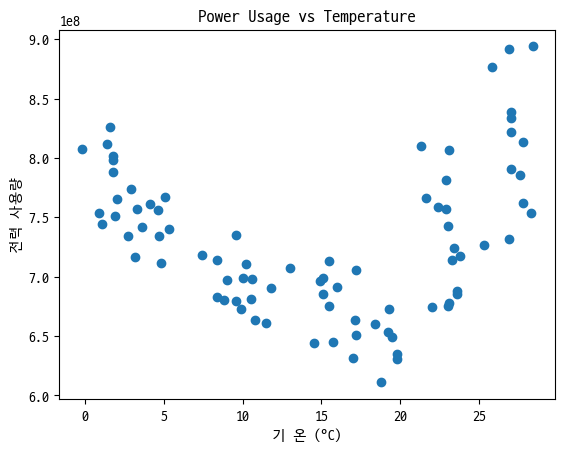

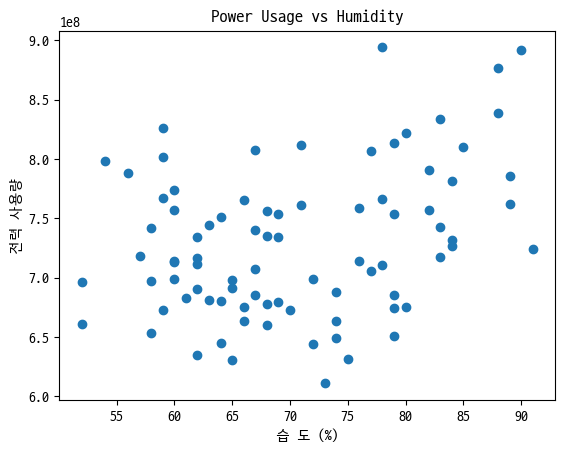

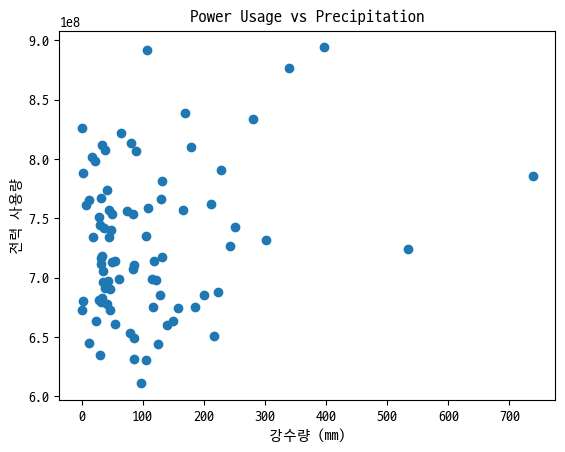

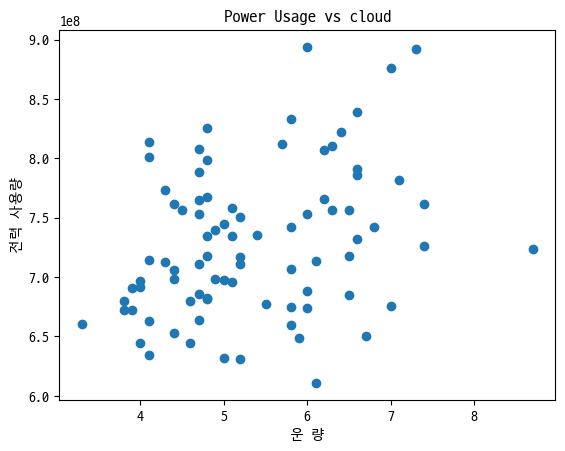

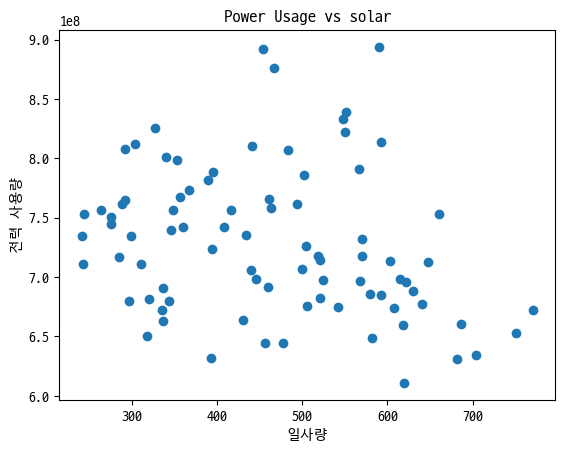

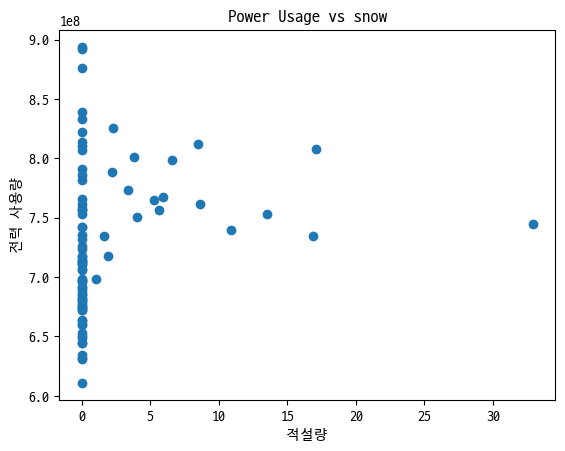

In [103]:
# 기온, 사용량
plt.scatter(kw_df['temp'], kw_df['usage'])
plt.xlabel('기 온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()

# 습도, 사용량
plt.scatter(kw_df['Humidity_mean'], kw_df['usage'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(kw_df['rainfall_total'], kw_df['usage'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(kw_df['cloud'], kw_df['usage'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(kw_df['solar'], kw_df['usage'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# 적설량, 사용량
plt.scatter(kw_df['snow'], kw_df['usage'])
plt.xlabel('적설량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs snow')
plt.show()

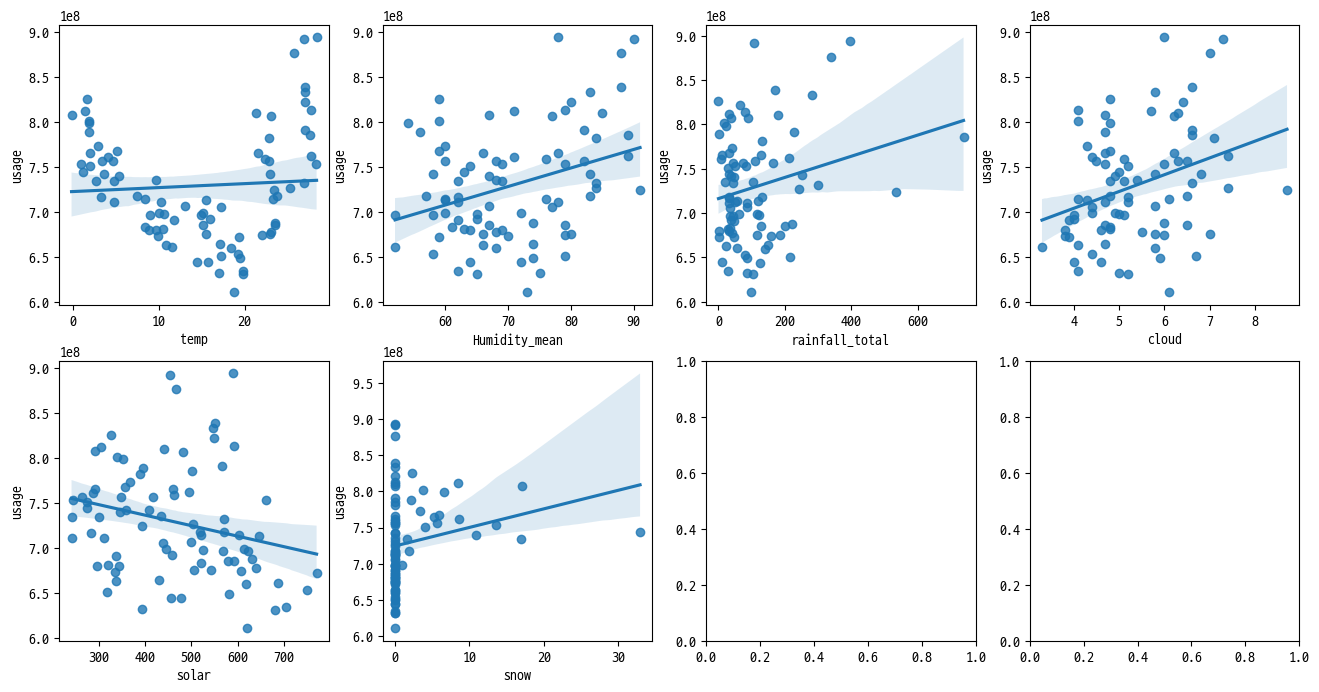

In [104]:
weather_kw_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
for i , feature in enumerate(weather_kw_df):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'usage', data = kw_df, ax = axs[row][col])

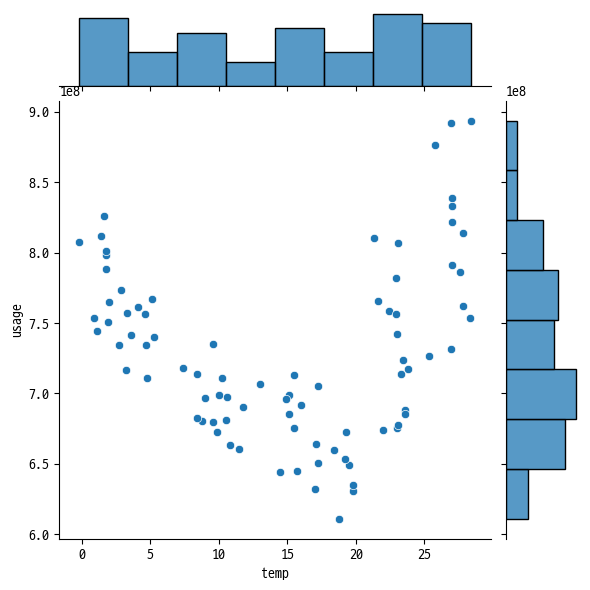

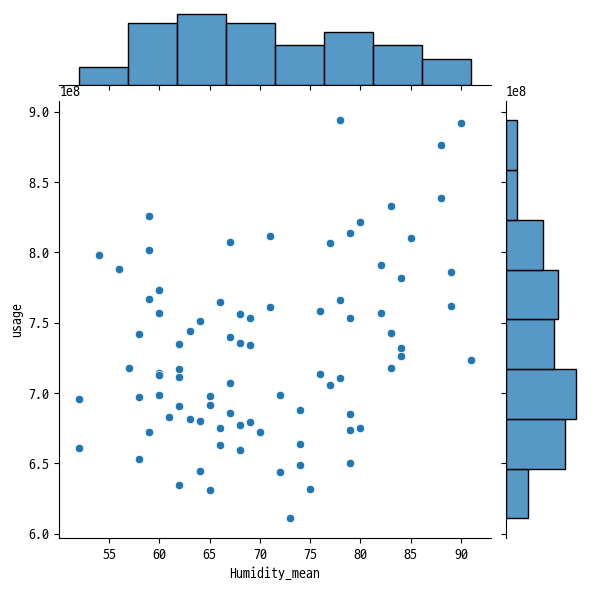

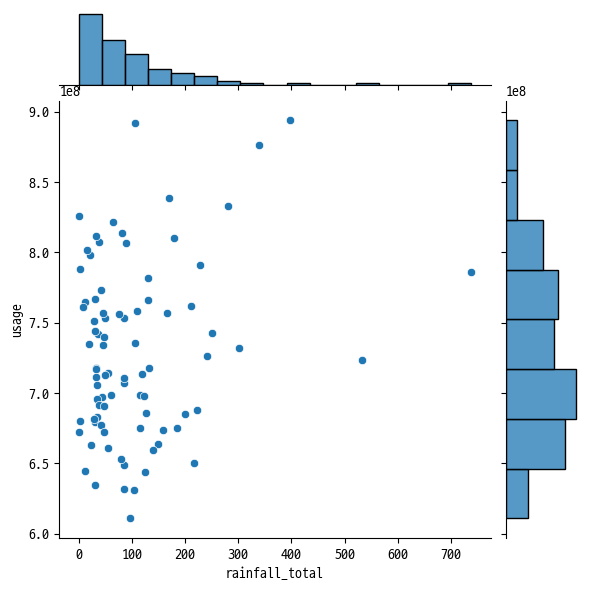

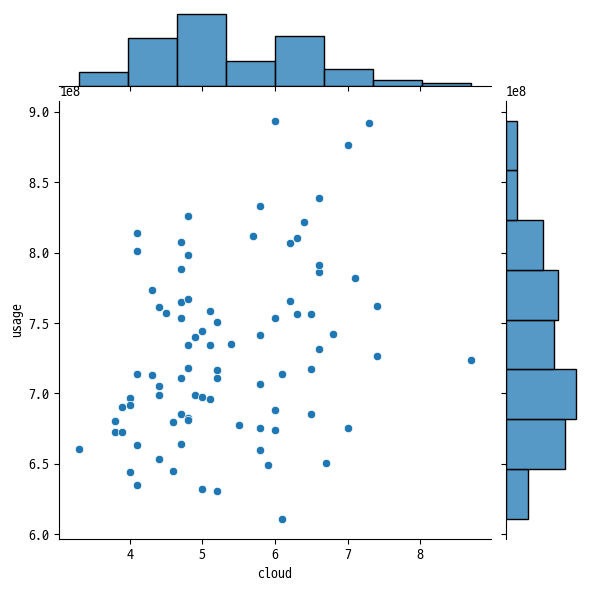

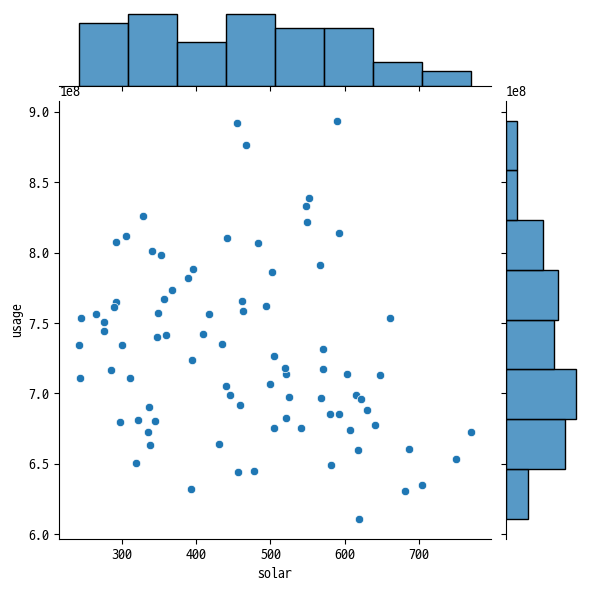

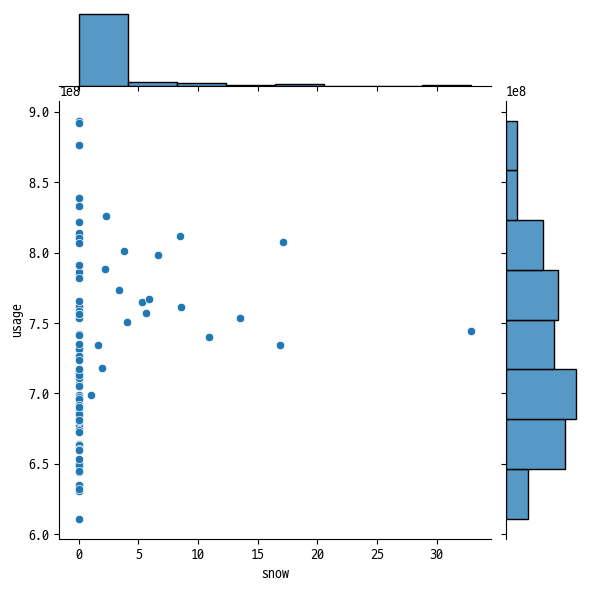

In [105]:
weather_kw_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']

for feature in weather_kw_df:
    sns.jointplot(x = feature, y = 'usage', data = kw_df)

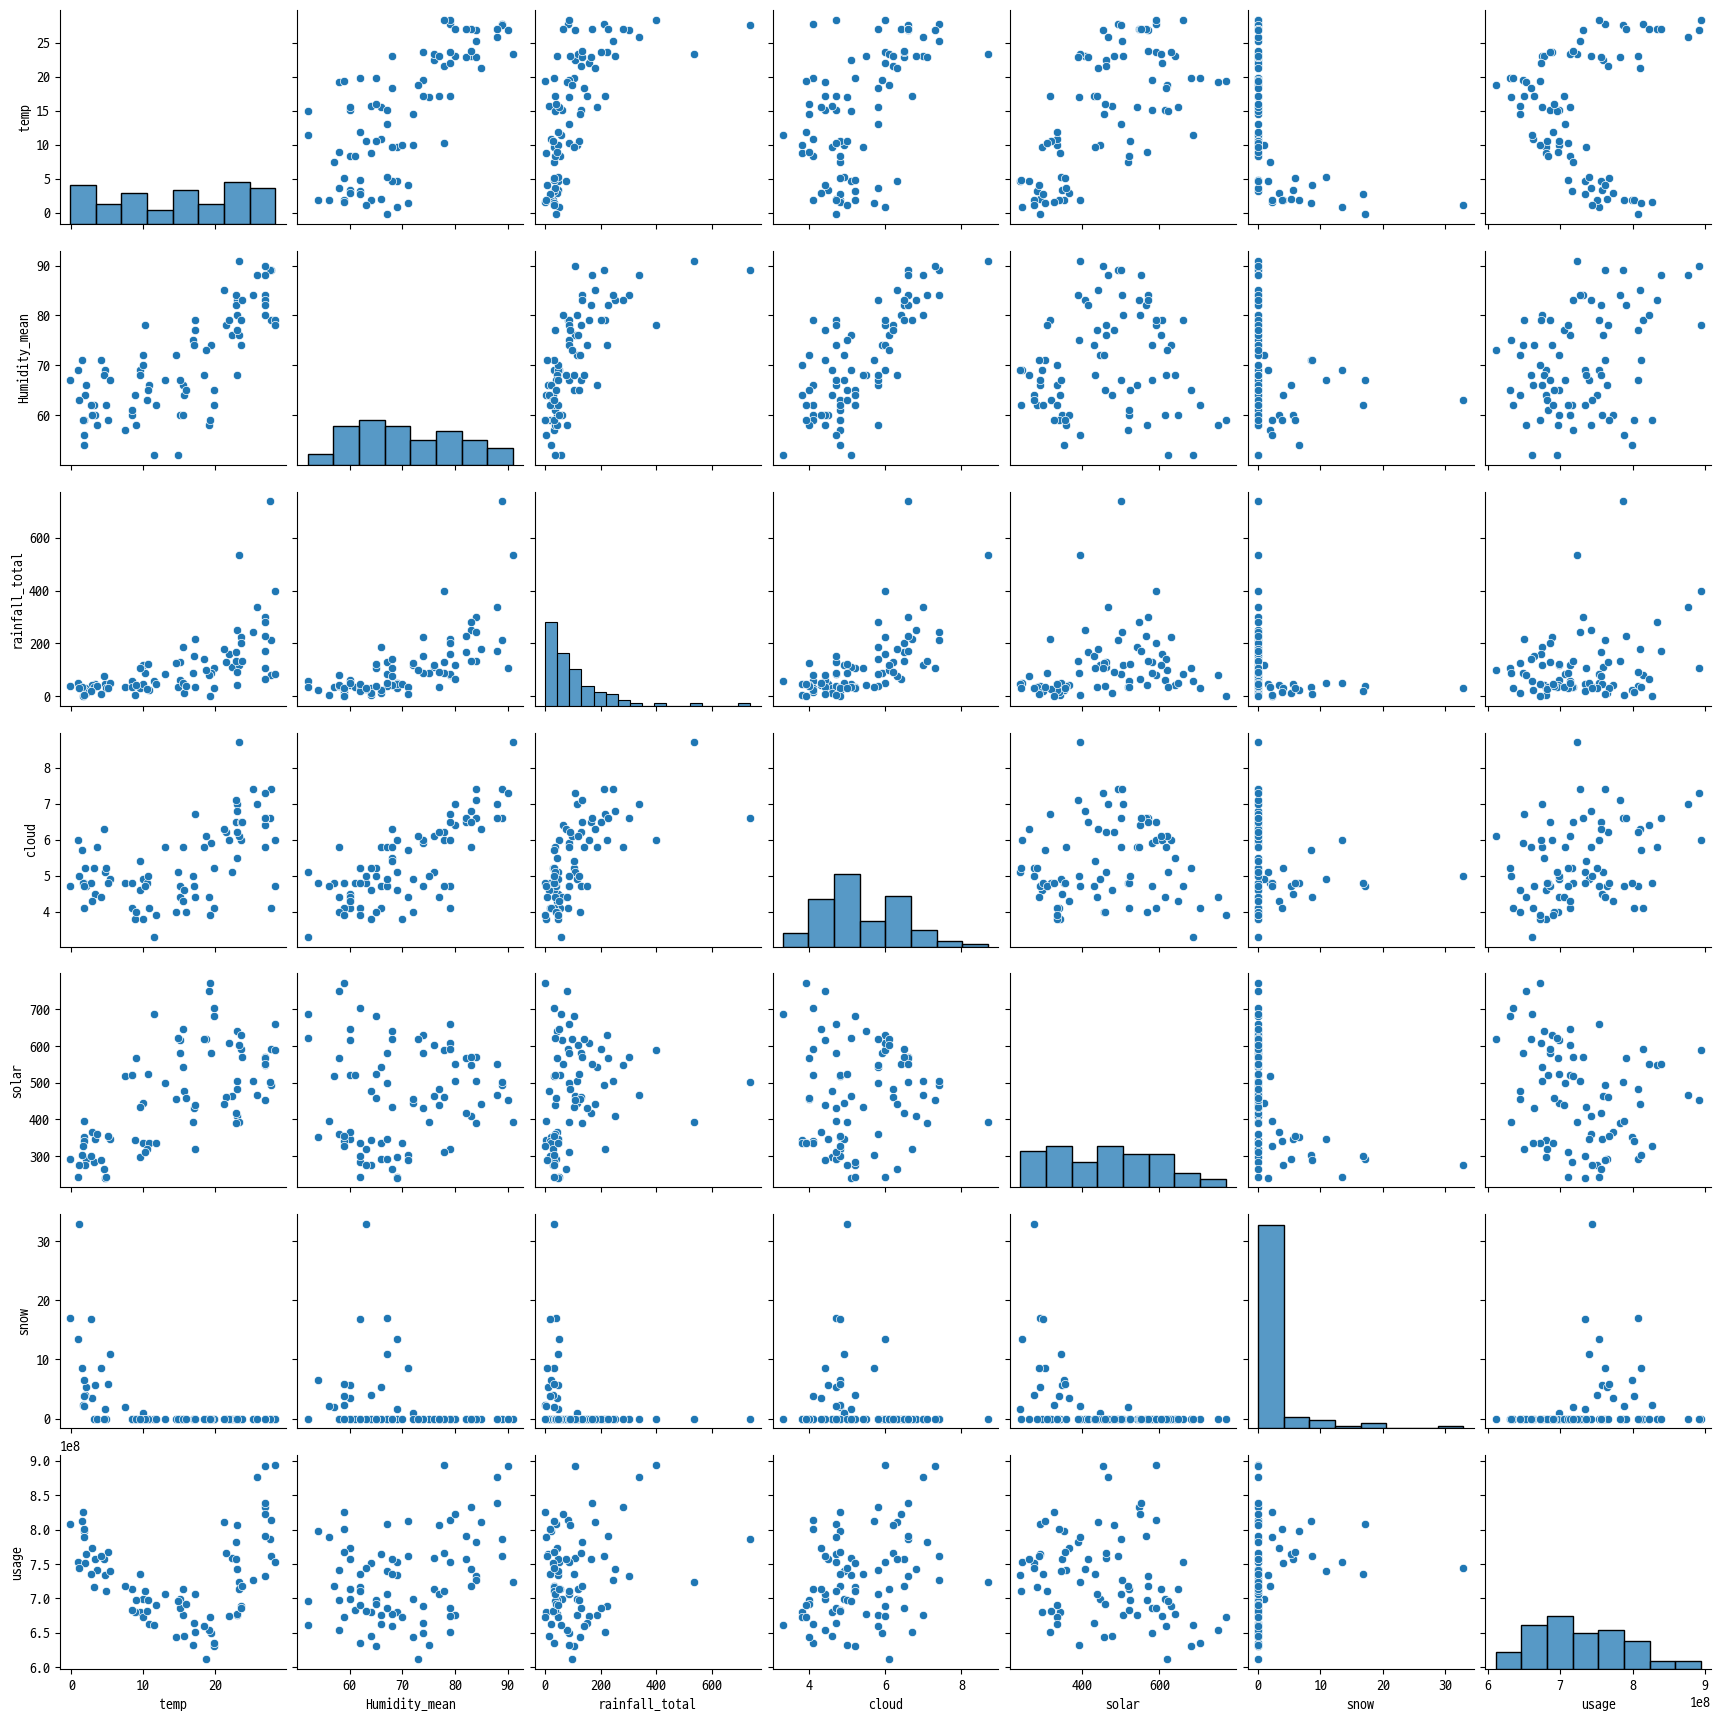

In [106]:
sns.pairplot(kw_df, vars=['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'])

In [107]:
weather_kw_df = ['rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
       # Scatter plot 생성
       scatter = go.Scatter(x=kw_df['temp'], y=kw_df['usage'], mode='markers', 
                            marker=dict(size=kw_df['Humidity_mean'],
                                   color=kw_df[feature], colorscale='Viridis'))

       # 레이아웃 생성
       layout = go.Layout(title='날씨와 전력량에 따른 관계    원크기 : 습도     색상 : ' + col_label[feature],
                          xaxis={'title': '기온'}, 
                            yaxis={'title': '전력량'}, hovermode='closest')

       # 그래프 생성
       fig = go.Figure(data=[scatter], layout=layout)

       # 그래프 출력
       fig.show()

In [108]:
weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    fig = px.scatter(kw_df,
                    x="temp",
                    y="usage",
                    title='날씨와 전력량에 따른 관계',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'usage': '전력량', feature: col_label[feature]})
    fig.show()

In [127]:
weather_kw_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Box plot 생성
    box = go.Box(x=kw_df[feature], y=kw_df['usage'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kw)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [132]:
weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['usage'], z=kw_df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량 데이터                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kw)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

Text(0.5, 1.0, '날씨와 전력량 데이터')

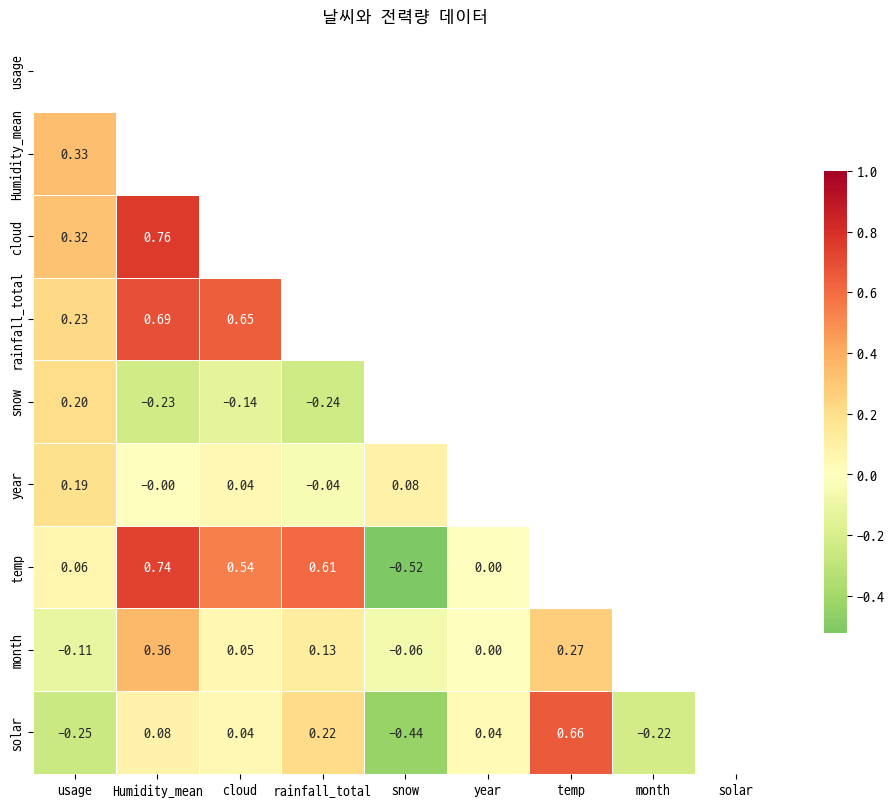

In [113]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_df.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력량 데이터")

In [138]:
weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Line plot 생성
    line_plot = px.line(kw_df, x='temp', y='usage', color=feature, 
                        title='날씨와 전력량 데이터', 
                        labels={'temp': '기온', 'usage': '전력량', feature: col_label[feature]})

# 그래프 출력
line_plot.show()

SyntaxError: invalid syntax (3397114497.py, line 6)